# Project 2 - Stock Portfolio Forecasting and Optimization on S&P500 Using Machine Learning and Search Methods

### Índice

1. [Introdução](#Introdução)
2. [Contexto](#Contexto)

### Introdução

Neste projeto, buscamos explorar técnicas de previsão de séries temporais e métodos de otimização para construir uma estratégia de investimento eficiente com base em dados do índice S&P500.
Utilizando uma combinação de algoritmos clássicos de aprendizado de máquina, como Random Forest, SVM, e métodos de aprendizado profundo, como LSTM, o objetivo é criar modelos capazes de prever os preços de ações. Além disso, aplicaremos métodos de busca e otimização, como Monte Carlo Simulations e Algoritmos Genéticos, para selecionar o melhor conjunto de ações, maximizando o retorno sobre um horizonte de um mês.

### Contexto

O índice S&P500 é amplamente utilizado como um dos principais indicadores de desempenho do mercado de ações dos Estados Unidos, representando as 500 maiores empresas de capital aberto.

A previsão de preços de ações e a otimização de portfólios são tarefas desafiadoras devido à alta volatilidade e imprevisibilidade do mercado financeiro. Estratégias baseadas em machine learning permitem capturar padrões históricos nos dados, enquanto métodos de otimização ajudam a selecionar ações que potencialmente oferecem maiores retornos ou menores riscos. Ao combinar essas duas abordagens, o projeto busca desenvolver uma estratégia de investimento robusta e eficiente, utilizando dados históricos de 2010 a 2023 para treinar os modelos e validar suas performances em simulações para janeiro de 2024.

### Acesso aos Dados

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_companies= pd.read_csv('datasets/sp500_companies.csv')
df_index=pd.read_csv('datasets/sp500_index.csv')
df_stocks=pd.read_csv('datasets/sp500_stocks.csv')

In [4]:
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,145.26,3563227709440,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.063544
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,224.23,3389415751680,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.060445
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,418.01,3107854221312,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.055424
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,181.97,2217249865728,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.039541
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,180.35,2216122646528,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.039521


In [5]:
df_index.head()

,Date,S&P500
0,2014-11-10,2038.26
1,2014-11-11,2039.68
2,2014-11-12,2038.25
3,2014-11-13,2039.33
4,2014-11-14,2039.82


In [6]:
df_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016735,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741024,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361355,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393158,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705978,70.501671,70.501671,69.648827,69.974915,4073337.0


In [7]:
print(df_companies.isnull().sum())
print(df_index.isnull().sum())
print(df_stocks.isnull().sum())

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees      10
Longbusinesssummary     0
Weight                  0
dtype: int64
Date      0
S&P500    0
dtype: int64
Date              0
Symbol            0
Adj Close    101626
Close        101626
High         101626
Low          101626
Open         101626
Volume       101626
dtype: int64


In [8]:
print(df_stocks.duplicated().sum())
print(df_companies.duplicated().sum())

0
0


### Pré-processamento

In [16]:
train_data = df_stocks[df_stocks['Date'] < '2024-01-01']
test_data = df_stocks[df_stocks['Date'] >= '2024-01-01']

In [17]:
print(f'Treino: {train_data.shape[0]} registros')
print(f'Teste: {test_data.shape[0]} registros')

Treino: 1771566 registros
Teste: 109654 registros


In [19]:
print(df_index.describe())
print(df_stocks.describe())

                                Date       S&P500
count                           2517  2517.000000
mean   2019-11-10 06:10:43.623361280  3300.848458
min              2014-11-10 00:00:00  1829.080000
25%              2017-05-11 00:00:00  2389.520000
50%              2019-11-08 00:00:00  2972.370000
75%              2022-05-10 00:00:00  4169.480000
max              2024-11-08 00:00:00  5995.540000
std                              NaN  1048.294837
                                Date     Adj Close         Close  \
count                        1881220  1.779594e+06  1.779594e+06   
mean   2017-06-07 05:35:21.497325312  9.641792e+01  1.043171e+02   
min              2010-01-04 00:00:00  2.036070e-01  2.220000e-01   
25%              2013-09-19 18:00:00  2.852962e+01  3.474000e+01   
50%              2017-06-07 12:00:00  5.325533e+01  6.255000e+01   
75%              2021-02-24 06:00:00  1.025672e+02  1.131700e+02   
max              2024-11-11 00:00:00  9.924400e+03  9.924400e+03   
std   

In [22]:
corr_matrix = df_stocks.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Ações')
plt.show()

ValueError: could not convert string to float: 'MMM'

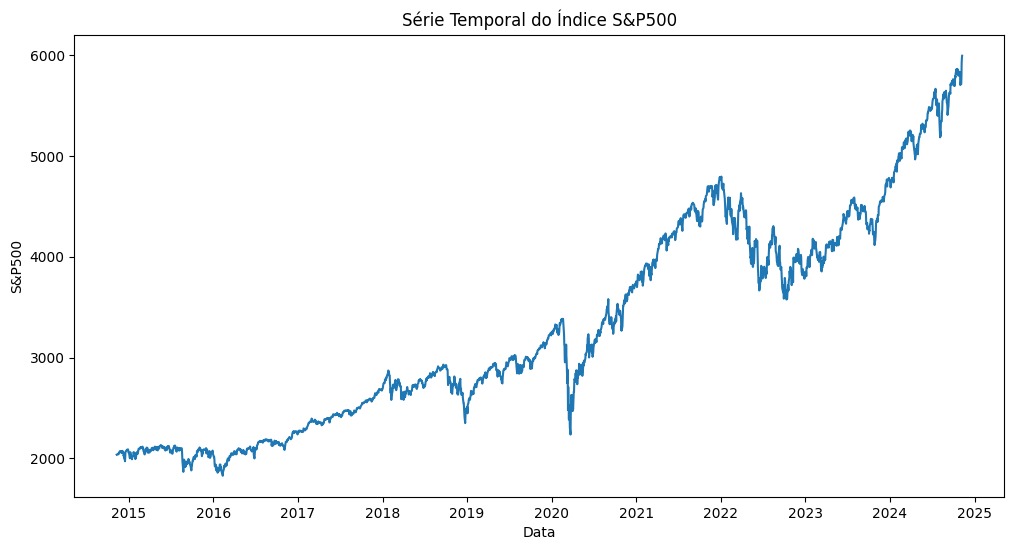

In [23]:
df_index['Date'] = pd.to_datetime(df_index['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df_index['Date'], df_index['S&P500'])
plt.title('Série Temporal do Índice S&P500')
plt.xlabel('Data')
plt.ylabel('S&P500')
plt.show()

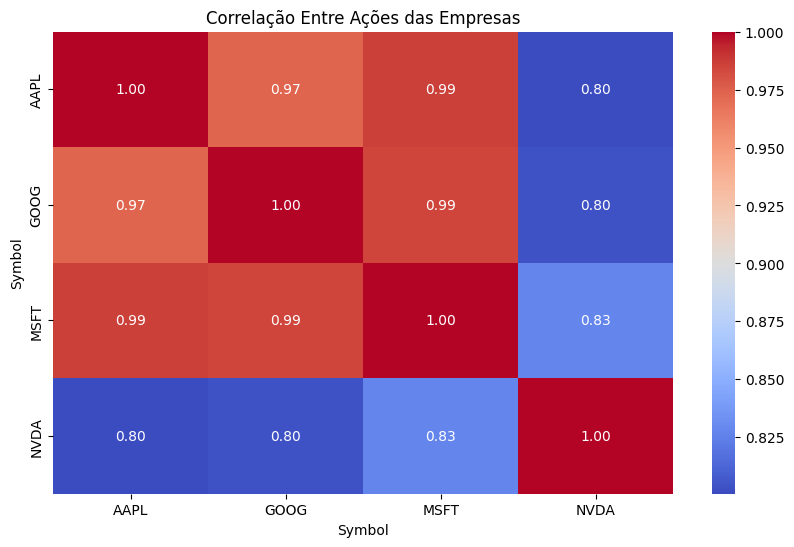

In [26]:
companies = ['AAPL', 'MSFT', 'GOOG', 'NVDA']
df_companies_data = df_stocks[df_stocks['Symbol'].isin(companies)]

# Pivotar os dados para ter uma coluna por empresa
df_pivot = df_companies_data.pivot(index='Date', columns='Symbol', values='Close')

# Matriz de correlação entre as ações das empresas
corr_matrix = df_pivot.corr()

# Mapa de calor (heatmap) da correlação entre ações
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação Entre Ações das Empresas')
plt.show()

Ou seja, isto acho que não serve para nada

In [ ]:

df_index['Date'] = pd.to_datetime(df_index['Date'])

# Separar os dados em treinamento e teste (dados até 2023 para treino, dados de 2024 para teste)
train_data = df_index[df_index['Date'] < '2024-01-01']
test_data = df_index[df_index['Date'] >= '2024-01-01']

# Definir as variáveis independentes e dependentes
X_train = train_data.drop(columns=[target, 'Date'])
y_train = train_data[target]
X_test = test_data.drop(columns=[target, 'Date'])
y_test = test_data[target]

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
